In [10]:
import pandas as pd

In [11]:
import numpy as np

In [12]:
import nltk

In [13]:

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [14]:
import re

In [15]:
from bs4 import BeautifulSoup

In [17]:
data=pd.read_csv('/content/drive/My Drive/IMDB/IMDB Dataset.csv')

In [18]:
data.columns

Index(['review', 'sentiment'], dtype='object')

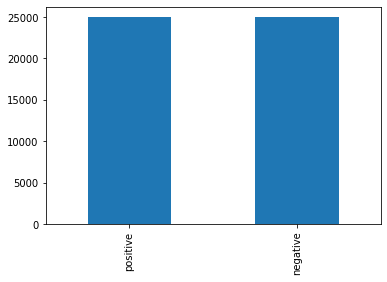

In [19]:
data['sentiment'].value_counts().plot(kind='bar')

In [25]:
for i in range(data.shape[0]):
  data['review_pro'][i]=BeautifulSoup(data['review'][i],'html.parser').get_text()



In [26]:
data.head()

,review,sentiment,review_pro
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. The filming tec...
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is..."


In [30]:
data['review_pro']=data['review_pro'].replace('[^a-zA-Z0-9]',' ',regex=True)

In [31]:
data.head()

,review,sentiment,review_pro
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production The filming tec...
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,Basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,Petter Mattei s Love in the Time of Money is...


In [33]:
X=data['review_pro']

In [34]:
from sklearn.preprocessing import LabelBinarizer

In [35]:
label=LabelBinarizer()

In [39]:
y=label.fit_transform(data['sentiment'])

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [42]:
cv=CountVectorizer(stop_words='english',ngram_range=(1,3))

In [44]:
train_cv=cv.fit_transform(X_train)

In [47]:
test_cv=cv.transform(X_test)

In [45]:
tfidf=TfidfTransformer(smooth_idf=False)

In [46]:
train_tfidf=tfidf.fit_transform(train_cv)

In [48]:
test_tfidf=tfidf.transform(test_cv)

In [49]:
from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier

In [50]:
log=LogisticRegression()

In [51]:
log.fit(train_tfidf,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
train_pred=log.predict(train_tfidf)

In [53]:
test_pred=log.predict(test_tfidf)

In [54]:
from sklearn.metrics import confusion_matrix,classification_report

In [55]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     20031
           1       0.96      0.97      0.97     19969

    accuracy                           0.97     40000
   macro avg       0.97      0.97      0.97     40000
weighted avg       0.97      0.97      0.97     40000



In [56]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4969
           1       0.88      0.91      0.89      5031

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [57]:
print(confusion_matrix(y_train,train_pred))

[[19277   754]
 [  532 19437]]


In [58]:
print(confusion_matrix(y_test,test_pred))

[[4347  622]
 [ 476 4555]]


In [59]:
def model_selection(log,train_tfidf,y_train,test_tfidf,y_test):
  log.fit(train_tfidf,y_train)
  train_pred=log.predict(train_tfidf)
  test_pred=log.predict(test_tfidf)
  print('Train report:')
  print(classification_report(y_train,train_pred))
  print('Test report :')
  print(classification_report(y_test,test_pred))
  print('Confusion matrix for train :')
  print(confusion_matrix(y_train,train_pred))
  print('Confusion matrix for test :')
  print(confusion_matrix(y_test,test_pred))




In [60]:
model_selection(log,train_tfidf,y_train,test_tfidf,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     20031
           1       0.96      0.97      0.97     19969

    accuracy                           0.97     40000
   macro avg       0.97      0.97      0.97     40000
weighted avg       0.97      0.97      0.97     40000

Test report :
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4969
           1       0.88      0.91      0.89      5031

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion matrix for train :
[[19277   754]
 [  532 19437]]
Confusion matrix for test :
[[4347  622]
 [ 476 4555]]


In [61]:
pac=PassiveAggressiveClassifier()

In [62]:
model_selection(pac,train_tfidf,y_train,test_tfidf,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20031
           1       1.00      1.00      1.00     19969

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

Test report :
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      4969
           1       0.90      0.93      0.91      5031

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

Confusion matrix for train :
[[20031     0]
 [    0 19969]]
Confusion matrix for test :
[[4440  529]
 [ 361 4670]]
